In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
%matplotlib notebook

In [3]:
df = pd.read_csv (r'C:\Users\dp\Desktop\_\Coursera\CropRecommendationData\Crop_recommendation.csv')
pd.set_option("display.max_rows", None, "display.max_columns", None)
                  
df
labels_list = list(set([i for i in df['label']]))

<IPython.core.display.Javascript object>


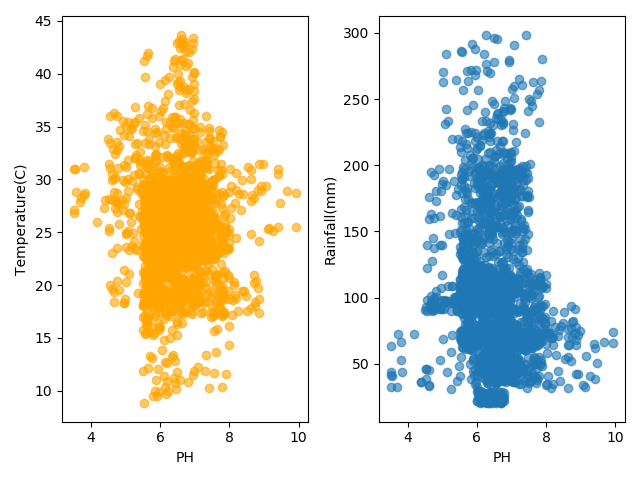

In [4]:
fig, ax = plt.subplots(1,2)
temp_ph = ax[0].scatter(df['ph'], df['temperature'], alpha = 0.6, c = 'orange')
rain_ph = ax[1].scatter(df['ph'], df['rainfall'], alpha = 0.6)
ax[0].set_xlabel('PH')
ax[1].set_xlabel('PH')
ax[0].set_ylabel('Temperature(C)')
ax[1].set_ylabel('Rainfall(mm)')

plt.tight_layout()

In [5]:
df1 = df.groupby('label').mean()
df1

,N,P,K,temperature,humidity,ph,rainfall
label,,,,,,,
apple,20.80,134.22,199.89,22.630942,92.333383,5.929663,112.654779
banana,100.23,82.01,50.05,27.376798,80.358123,5.983893,104.626980
blackgram,40.02,67.47,19.24,29.973340,65.118426,7.133952,67.884151
chickpea,40.09,67.79,79.92,18.872847,16.860439,7.336957,80.058977
coconut,21.98,16.93,30.59,27.409892,94.844272,5.976562,175.686646
coffee,101.20,28.74,29.94,25.540477,58.869846,6.790308,158.066295
cotton,117.77,46.24,19.56,23.988958,79.843474,6.912675,80.398043
grapes,23.18,132.53,200.11,23.849575,81.875228,6.025937,69.611829
jute,78.40,46.86,39.99,24.958376,79.639864,6.732778,174.792798


<IPython.core.display.Javascript object>


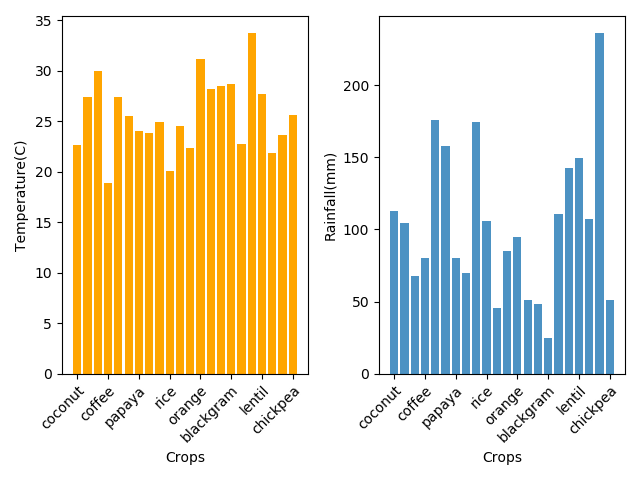

In [43]:
fig, ax = plt.subplots(1,2)
df2 = df1.reset_index()
temp_labels = ax[0].bar(df2['label'], df2['temperature'], color = 'orange')
rainfall_labels = ax[1].bar(df2['label'], df2['rainfall'], alpha = 0.8)
ax[0].set_xlabel('Crops')
ax[1].set_xlabel('Crops')
ax[0].set_ylabel('Temperature(C)')
ax[1].set_ylabel('Rainfall(mm)')
ax[0].set_xticks(ticks = np.arange(0,len(labels_list),3))
ax[0].set_xticklabels(labels = labels_list[::3], rotation = 45, horizontalalignment = 'right', rotation_mode = 'anchor')
ax[1].set_xticks(ticks = np.arange(0,len(labels_list),3))
ax[1].set_xticklabels(labels = labels_list[::3], rotation = 45, horizontalalignment = 'right', rotation_mode = 'anchor')

plt.tight_layout()

In [58]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import validation_curve
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB 
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn import preprocessing

In [49]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['label'] = label_encoder.fit_transform(df['label'])

In [61]:
X = np.array(df[df.columns[0:7]])
y = np.array(df[df.columns[7:8]])

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 0)
# X_train = X_train.ravel() # Use ravel function only for target columns
# X_test = X_test.ravel() # Used for flattening of array
y_train = y_train.ravel()
y_test = y_test.ravel()

In [51]:
knn = KNeighborsClassifier(n_neighbors = 5).fit(X_train, y_train)
pred = knn.predict(X_test)
acc_score = accuracy_score(y_test, pred)
acc_score

0.9781818181818182

In [52]:
clf = GaussianNB().fit(X_train, y_train)
pred = clf.predict(X_test)
acc_score = accuracy_score(y_test, pred)
acc_score

0.9945454545454545

In [53]:
clf = LogisticRegression(solver = 'lbfgs', max_iter = 400).fit(X_train, y_train)
pred = clf.predict(X_test)
acc_score = accuracy_score(y_test, pred)
acc_score

0.9672727272727273

In [54]:
clf = SVC(C = 1, degree = 3).fit(X_train, y_train)
pred = clf.predict(X_test)
acc_score = accuracy_score(y_test, pred)
acc_score

0.9781818181818182

In [55]:
clf = DecisionTreeClassifier(random_state = 0).fit(X_train, y_train)
pred = clf.predict(X_test)
acc_score = accuracy_score(y_test, pred)
acc_score

0.9890909090909091